# Neural Network FINAL

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import GRU, Dense, Bidirectional
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('../data/cleaned/expanded_mbti_df.csv')

In [3]:
X = data.posts_no_digits

In [6]:
targets = ['E_I_code', 'F_T_code', 'N_S_code', 'J_P_code']

Comparing E vs I:
0    0.769568
1    0.230432
Name: E_I_code, dtype: float64


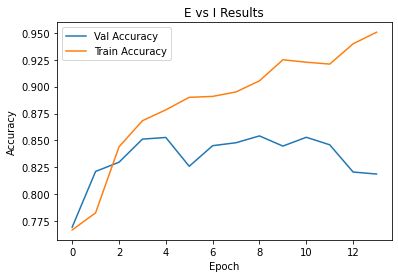

Comparing F vs T:
1    0.541095
0    0.458905
Name: F_T_code, dtype: float64


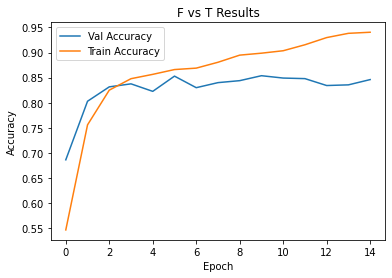

Comparing N vs S:
1    0.862017
0    0.137983
Name: N_S_code, dtype: float64


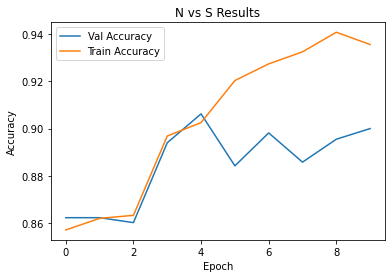

Comparing J vs P:
0    0.60415
1    0.39585
Name: J_P_code, dtype: float64


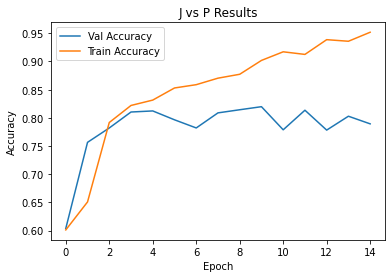

In [10]:
for target in targets:

    print(f'Comparing {target[0]} vs {target[2]}:')
    
    y = data[target]
    print(y.value_counts(normalize=True))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = y)

    tokenizer = Tokenizer(750)
    tokenizer.fit_on_texts(X_train)
    x_train = tokenizer.texts_to_sequences(X_train)
    x_test = tokenizer.texts_to_sequences(X_test)
    x_train = pad_sequences(x_train)
    x_test = pad_sequences(x_test)
    
    model = Sequential()
    model.add(Embedding(input_dim = tokenizer.num_words, output_dim=64))
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(GRU(100, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2)))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 0, epochs = 25, batch_size=64, callbacks = EarlyStopping(monitor='val_accuracy', patience=5))
    
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{target[0]} vs {target[2]} Results')
    plt.show();